In [2]:
import os
import sys
import matplotlib.pyplot as plt
import time

sys.path.append('..')
from dataloading import data_loading, preprocessing

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [3]:
tfs = transforms.Compose([
    preprocessing.NormalizeImage(),
])

ds_train, ds_val = data_loading.get_datasets(
    '/scratch/phys/project/sin/hackathon/data/afm.h5',
    train_transform=tfs,
    val_transform=tfs,
    train_size=0.8,
)

In [4]:
s = ds_train[0]
for k in s:
    print(f"k: {k}, shape: {len(s[k]) if hasattr(s[k], '__len__') else s[k].shape}")
    
print(s['nodes'])
print(s['edges'])

k: x, shape: 1
k: nodes, shape: 28
k: edges, shape: 30
[[-4.4753222e+00 -7.1776110e-01 -1.7682752e-02 -1.6295999e-01
   9.0000000e+00]
 [-3.6612403e-01  2.5187013e-01 -4.6218195e-04 -2.5634000e-01
   8.0000000e+00]
 [-1.7928754e+00 -1.4687225e+00 -4.3630511e-03 -2.3490000e-01
   7.0000000e+00]
 [ 4.6500545e+00 -5.7013023e-01  2.0348208e-02 -1.2060000e-02
   6.0000000e+00]
 [-4.6680541e+00  2.8967602e+00 -1.9098058e-02  3.6500001e-03
   6.0000000e+00]
 [ 3.8583553e+00  5.8185661e-01  1.5381710e-02  2.8599999e-03
   6.0000000e+00]
 [ 4.0359635e+00 -1.8279052e+00  1.9663807e-02  3.7000000e-03
   6.0000000e+00]
 [-5.0477362e+00  1.5534122e+00 -2.0683818e-02 -2.6030000e-02
   6.0000000e+00]
 [ 2.4665892e+00  4.8317239e-01  9.6410671e-03  2.1310000e-02
   6.0000000e+00]
 [ 2.6468043e+00 -1.9337662e+00  1.3894847e-02 -1.2160000e-02
   6.0000000e+00]
 [-3.3107619e+00  3.2356703e+00 -1.3368536e-02  1.3800000e-03
   6.0000000e+00]
 [-4.0713801e+00  5.6233317e-01 -1.6671246e-02  2.2484000e-01
   

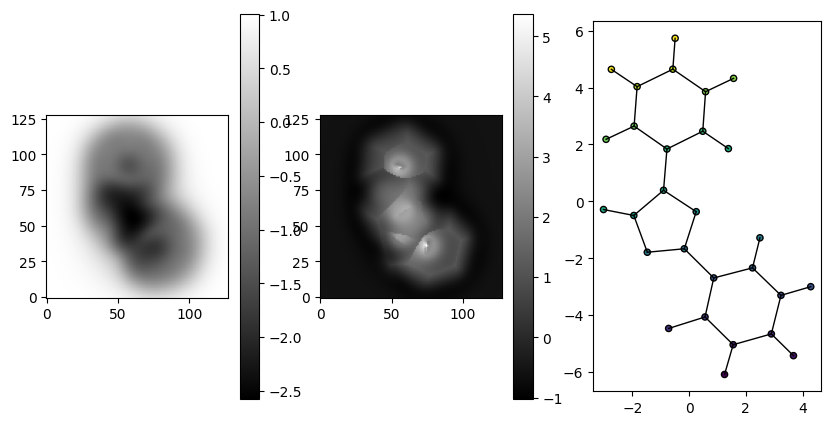

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 3, 1)
im = ax.imshow(s['x'][0, ..., 0], cmap='gray', origin='lower')
plt.colorbar(im)

ax = plt.subplot(1, 3, 2)
im = ax.imshow(s['x'][0, ..., -1], cmap='gray', origin='lower')
plt.colorbar(im)

ax = plt.subplot(1, 3, 3)
ax.scatter(s['nodes'][:, 1], s['nodes'][:, 0], c=s['nodes'][:, 2], s=20, edgecolors='k', cmap='viridis')

for e in s['edges']:
    ax.plot(s['nodes'][e, 1], s['nodes'][e, 0], 'k-', lw=1)

ax.set_aspect('equal')


In [6]:
def afm_collate_fn(batch):
    images = torch.stack([torch.from_numpy(item['x']) for item in batch])
    points = [torch.from_numpy(item['nodes']) for item in batch]
    edges = [torch.from_numpy(item['edges']) for item in batch]
    #points = [item_ for item in batch for item_ in item[2]]
    #edges = [item_ for item in batch for item_ in item[3]]
    return [images, points, edges]


In [8]:
dl = DataLoader(ds_train, batch_size=8, collate_fn=afm_collate_fn)
dl = iter(dl)
for i in range(10):
    t0 = time.time()
    batch = next(dl)
    print(f"images: {batch[0].shape}, points: {len(batch[1])} - {batch[1][0].shape}, edges: {len(batch[2])} - {batch[2][0].shape}")
    print(f"Time: {time.time() - t0}")
    time.sleep(0.1)

images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([30, 2])
Time: 2.282468318939209
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([29, 2])
Time: 2.5012733936309814
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([28, 5]), edges: 8 - torch.Size([29, 2])
Time: 2.101328134536743
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([36, 5]), edges: 8 - torch.Size([37, 2])
Time: 2.309398889541626
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([30, 5]), edges: 8 - torch.Size([31, 2])
Time: 2.101194143295288
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([37, 5]), edges: 8 - torch.Size([36, 2])
Time: 2.099842071533203
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([31, 5]), edges: 8 - torch.Size([32, 2])
Time: 2.4983108043670654
images: torch.Size([8, 1, 128, 128, 10]), points: 8 - torch.Size([34, 5]), edges: 8 - to